# Examen final Nathan HEINIMANN, Kelian VAN DEN BERGH, Lisa DEKIMECHE et Romane PIEGAY

## Contexte

Vous êtes analyste de données dans une entreprise qui souhaite analyser ses performances de ventes trimestrielles. On vous donne un dossier contenant 10 fichiers Excel. Chaque fichier comporte: 
- Date: Date à laquelle l'information a été enregistrée 
- Produit: Type de produit vendu; Il existe trois types de produit: A, B et C
- Région: Région dans laquelle la vente à eue lieu: Ouest, Sud, Est et Nord
- Quantité: Quantité vendue du produit
- Prix unitaire: Prix auquel une unité de produit est vendue
- Chiffre d'Affaire: Quantité * prix unitaire

Vous avez aussi accès à un fichier "référentiel.xlsx". Ce fichier comporte le type de produit et le prix unitaire de base de chaque produit. 

## Objectifs de l'examen

### Tronc commun (/13)

* **Tâches à effectuer** : 
1. Importez les dix fichiers Excels et fusionner les données en un seul DataFrame nommé "data" (/1)
2. Changez le type de donnée de la colonne "Date" en "datetime" (/1)
3. Vérifiez la présence de donnée manquante. Si donnée manquante il y a, remplacez la par la valeur qui la précède. (/1)
4. Calculez le chiffre d'affaire total et les chiffres d'affaires par produit. Stockez ces valeurs dans un DataFrame nommé "CA". (/1)
5. Créez une pivot table qui montre le chiffre d'affaire par mois (lignes) et par région (colonnes). (/2)
6. Importez le fichier référentiel et effectuez une jointure avec votre DataFrame "data". (/2)
7. Créez une nouvelle colonne qui représente les mois de ventes. Appelez la colonne "mois". (/1)
8. Créez un graphique qui présente l'évolution du chiffre d'affaire mensuel pour les trois produits. (/1)
9. Créez un "boxplot" des prix unitaires de chaque produits. (/1)
10. En utilisant xlwings, créez un nouveau fichier Excel nommé "Analyse_CA.xlsx" qui comporte (/2):
    - Spreadsheet 1: Le DataFrame "data"
    - Spreadsheet 2: Les graphiques boxplot et chiffre d'affaire mensuels
    - Spreadsheet 3: Le DataFrame "CA" et la pivot table (question 5.)

### Tronc avancé (/7): 

Pour ce tronc avancé, le détail des tâches à effectuer n'est pas disponible. C'est à vous de comprendre le problème et de le traduire en une série d'opérations en code python. Pour cela, vous allez devoir vous appuyer sur de la documentation. 

* L'entreprise veut stabiliser ces ventes sur l'année et pour cela et supprimer de son offre les produits dont la vente est trop irrégulière : **Identifiez les produits dont la vente est la plus fluctuante**. (/2)
**[Documentation 1](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html)**, **[Documentation 2](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html)**


* L'entreprise veut savoir si les prix qu'elle applique ont une incidence sur les quantités vendues. **Trouvez l'influence des prix sur les quantités vendues**. (/3) (Indice: Une régression linéaire peut permettre de trouver une telle relation) 
**[Documentation 3](https://www.statsmodels.org/stable/regression.html)**

* L'entreprise pensent qu'il existe un effet de saisonalité dans ses ventes. Particulièrement, il semblerait que les ventes du premier trimestre sont plus basses que les ventes du dernier trimestre.**Testez si cette différence est significative**. (/2)
**[Documentation 4](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ttest_ind.html)**

### Fichiers attendus: 
1. Le notebook python qui effectue les 10 tâches à effectuer (Tronc commun) + la réponse aux questions ci-desus (Tronc avancé) **avec les explications nécessaires en Markdown**.
2. Le fichier Excel "Analyse_CA.xlsx"

*PS: 1pt bonus pour la clarté du code, la qualité du fichier excel et le design des graphiques!*

Tâche 1 : on importe la bibliothèque pandas, on uploade les fichiers sur Python (avec la méthode read excel) puis on fusionne les différents fichiers Excel (avec la concaténation) 

In [63]:
import pandas as pd

In [64]:
df1 = pd.read_excel(r"C:\Users\roman\Downloads\Ventes_2023_Part_1.xlsx")
df2 = pd.read_excel(r"C:\Users\roman\Downloads\Ventes_2023_Part_2.xlsx")
df3 = pd.read_excel(r"C:\Users\roman\Downloads\Ventes_2023_Part_3.xlsx")
df4 = pd.read_excel(r"C:\Users\roman\Downloads\Ventes_2023_Part_4.xlsx")
df5 = pd.read_excel(r"C:\Users\roman\Downloads\Ventes_2023_Part_5.xlsx")
df6 = pd.read_excel(r"C:\Users\roman\Downloads\Ventes_2023_Part_6.xlsx")
df7 = pd.read_excel(r"C:\Users\roman\Downloads\Ventes_2023_Part_7.xlsx")
df8 = pd.read_excel(r"C:\Users\roman\Downloads\Ventes_2023_Part_8.xlsx")
df9 = pd.read_excel(r"C:\Users\roman\Downloads\Ventes_2023_Part_9.xlsx")
df10 = pd.read_excel(r"C:\Users\roman\Downloads\Ventes_2023_Part_10.xlsx")

In [67]:
data=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10],ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1000 non-null   datetime64[ns]
 1   Produit             1000 non-null   object        
 2   Région              1000 non-null   object        
 3   Quantité            1000 non-null   int64         
 4   Prix unitaire       1000 non-null   float64       
 5   Chiffre d'affaires  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 47.0+ KB


In [59]:
data.to_excel('fusion_data.xlsx', index=False)

Tâche 2 

In [68]:
data['Date_vf'] = pd.to_datetime(data['Date'])
print(data.dtypes)

Date                  datetime64[ns]
Produit                       object
Région                        object
Quantité                       int64
Prix unitaire                float64
Chiffre d'affaires           float64
Date_vf               datetime64[ns]
dtype: object


Tâche 3 : on vérifie s'il y a des valeurs nulles dans le data frame, si il y en a, elles sont remplacées par la valeur précédente. On vérifie ensuite que la manip a bien été effectuée avec un message. 

In [32]:
if data.isnull().values.any():
    data.fillna(method='ffill',inplace=True)
if data.isnull().values.any():
    print("Il y a des valeurs manquantes")
else :
    print ("Toutes les valeurs manquantes ont été remplacées")

Toutes les valeurs manquantes ont été remplacées


Tâche 4

In [39]:
CA_total = data ["Chiffre d'affaires"].sum() 
print (CA_total)

546231.9551992661


In [70]:
CA_produit = data.groupby('Produit')["Chiffre d'affaires"].sum() 
print(CA_produit)

Produit
Produit A    187028.290157
Produit B    179920.204727
Produit C    179283.460316
Name: Chiffre d'affaires, dtype: float64


In [72]:
CA = pd.DataFrame({'Produit': ['Total'],
                   "Chiffre d'affaires": [CA_total] })
CA.head()

,Produit,Chiffre d'affaires
0,Total,546231.955199


In [82]:
print(type(CA_produit))
df123 = CA_produit.to_frame()
df123.head()

<class 'pandas.core.series.Series'>


,Chiffre d'affaires
Produit,
Produit A,187028.290157
Produit B,179920.204727
Produit C,179283.460316


Tâche 5

In [73]:
# Charger les données depuis Excel dans un DataFrame
data = pd.read_excel(r"C:\Users\roman\OneDrive\Documents\Grenoble\PGE1\S2\S2 Python\fusion_data.xlsx")
# Créer la pivot table
pivot_data = pd.pivot_table(data, 
                          index=pd.Grouper(key='Date', freq='ME'),  # Grouper par mois
                          columns='Région',  # Colonnes pour les régions
                          values='Chiffre d\'affaires',  # Valeurs à agréger
                          aggfunc='sum',  # Agrégation par somme (par défaut)
                          fill_value=0)  # Remplacer les valeurs NaN par 0

# Trier les mois par ordre croissant
pivot_data = pivot_data.sort_index()

# Afficher la pivot table
print(pivot_data)

Région               Est          Nord         Ouest           Sud
Date                                                              
2023-01-31  10037.028399  13076.338478   7710.564014   8213.807744
2023-02-28   9837.787233   9853.258419  19094.963887  10051.177005
2023-03-31   3562.719474   8653.392696  10167.234999   8646.945490
2023-04-30   9297.540059  14065.944384  10668.264692  14607.472470
2023-05-31  10449.979162  16075.861928  13966.637315   8783.433772
2023-06-30  12085.008995  12739.880874  12484.007879  12037.267731
2023-07-31   9123.243007  10750.532192  10123.820477  10406.780030
2023-08-31  16581.733330  18964.725727  14757.565811  11905.031135
2023-09-30   5461.273695  10868.912146  17037.934449  14025.384478
2023-10-31  13161.063580   8935.674540   9157.426860   9080.505937
2023-11-30   5664.529823   7460.935302  12038.926403  10307.182117
2023-12-31  12607.537699  16299.983513  16003.263805   9341.472040


Tâche 6

In [93]:
# Charger les données de ventes depuis Excel dans un DataFrame
df_ventes = pd.read_excel(r"C:\Users\roman\Downloads\fusion_data.xlsx")

# Charger les données du référentiel depuis Excel dans un DataFrame
df_referentiel = pd.read_excel(r"C:\Users\roman\Downloads\referentiel.xlsx")



In [100]:
# Fusionner les DataFrames sur la colonne 'Produit'
data_q6 = pd.merge(df_ventes, df_referentiel, on='Produit', how='inner')
# Afficher les premières lignes du DataFrame fusionné
print(data_q6.head())
data_q6.columns


        Date    Produit Région  Quantité  Prix unitaire  Chiffre d'affaires  \
0 2023-04-13  Produit C  Ouest         9      56.916644          512.249799   
1 2023-12-15  Produit C  Ouest        15      97.841244         1467.618661   
2 2023-09-28  Produit A    Sud        18      21.299519          383.391348   
3 2023-04-17  Produit B    Est        13      11.525290          149.828768   
4 2023-03-13  Produit B    Sud         8      79.314239          634.513912   

      Date.1     Catégorie  Prix Standard  
0 2023-04-13  Alimentation             15  
1 2023-12-15  Alimentation             15  
2 2023-09-28  Électronique             80  
3 2023-04-17        Ménage             35  
4 2023-03-13        Ménage             35  


Index(['Date', 'Produit', 'Région', 'Quantité', 'Prix unitaire',
       'Chiffre d'affaires', 'Date.1', 'Catégorie', 'Prix Standard'],
      dtype='object')

In [103]:
#suppression colonne Date
data_q6.drop("Date.1", axis=1)

,Date,Produit,Région,Quantité,Prix unitaire,Chiffre d'affaires,Catégorie,Prix Standard
0,2023-04-13,Produit C,Ouest,9,56.916644,512.249799,Alimentation,15
1,2023-12-15,Produit C,Ouest,15,97.841244,1467.618661,Alimentation,15
2,2023-09-28,Produit A,Sud,18,21.299519,383.391348,Électronique,80
3,2023-04-17,Produit B,Est,13,11.525290,149.828768,Ménage,35
4,2023-03-13,Produit B,Sud,8,79.314239,634.513912,Ménage,35
...,...,...,...,...,...,...,...,...
995,2023-02-07,Produit C,Sud,6,12.709348,76.256091,Alimentation,15
996,2023-10-20,Produit A,Est,1,96.534309,96.534309,Électronique,80
997,2023-05-19,Produit B,Est,16,70.108112,1121.729786,Ménage,35
998,2023-12-22,Produit A,Nord,15,93.988458,1409.826868,Électronique,80


In [ ]:
# Enregistrer le DataFrame fusionné dans un nouveau fichier Excel
data_q6.to_excel('data_q6.xlsx', index=False)

Tâche 7

In [123]:
# Assurez-vous que la colonne 'Date' est au format datetime
data_q6['Date'] = pd.to_datetime(data_q6['Date'])

# Créer une nouvelle colonne 'mois' contenant les mois de ventes
data_q6['Mois'] = data_q6['Date'].dt.month

# Afficher les premières lignes du DataFrame avec la nouvelle colonne 'mois'
print(data_q6)


          Date    Produit Région  Quantité  Prix unitaire  Chiffre d'affaires  \
0   2023-04-13  Produit C  Ouest         9      56.916644          512.249799   
1   2023-12-15  Produit C  Ouest        15      97.841244         1467.618661   
2   2023-09-28  Produit A    Sud        18      21.299519          383.391348   
3   2023-04-17  Produit B    Est        13      11.525290          149.828768   
4   2023-03-13  Produit B    Sud         8      79.314239          634.513912   
..         ...        ...    ...       ...            ...                 ...   
995 2023-02-07  Produit C    Sud         6      12.709348           76.256091   
996 2023-10-20  Produit A    Est         1      96.534309           96.534309   
997 2023-05-19  Produit B    Est        16      70.108112         1121.729786   
998 2023-12-22  Produit A   Nord        15      93.988458         1409.826868   
999 2023-11-29  Produit B  Ouest        17      33.894677          576.209503   

        Date.1     Catégori

Tâche 8

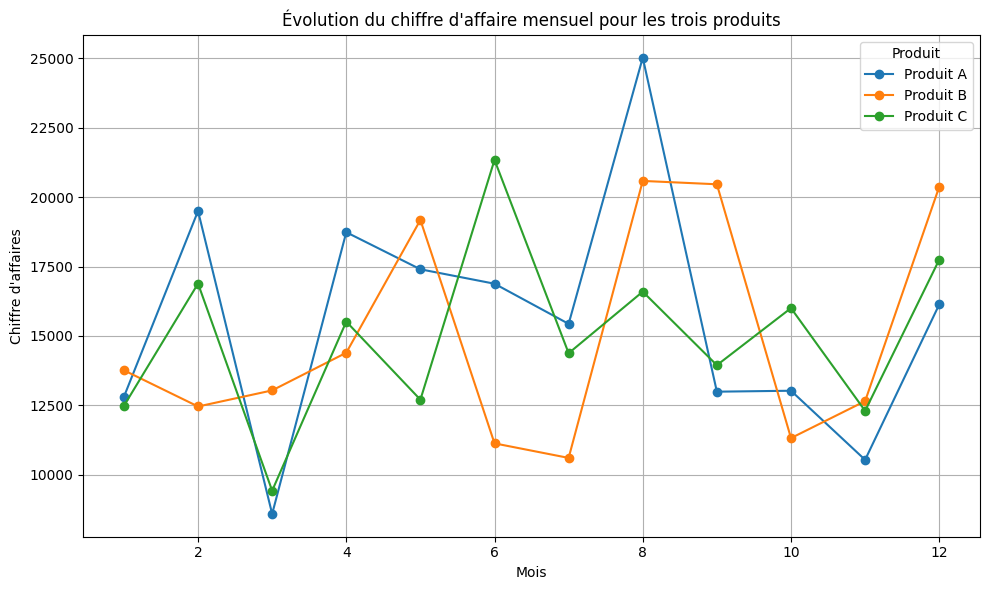

In [134]:
import matplotlib.pyplot as plt

# Créer une figure et des axes
fig1, ax = plt.subplots(figsize=(10, 6))

# Grouper les données par mois et produit, puis calculer le chiffre d'affaire mensuel pour chaque produit
ca_mensuel_produit = data_q6.groupby(['Mois', 'Produit'])["Chiffre d'affaires"].sum().unstack()

# Tracer l'évolution du chiffre d'affaire mensuel pour chaque produit
ca_mensuel_produit.plot(ax=ax, marker='o')

# Ajouter des titres et des légendes
plt.title("Évolution du chiffre d'affaire mensuel pour les trois produits")
plt.xlabel("Mois")
plt.ylabel("Chiffre d'affaires")
plt.legend(title='Produit')

# Afficher le graphique
plt.grid(True)
plt.tight_layout()
plt.show()

Tâche 9

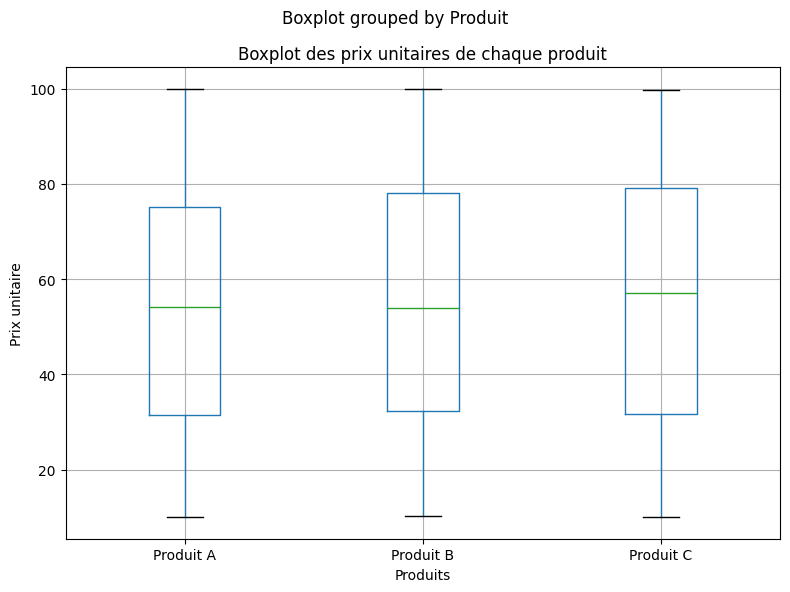

In [136]:
# Créer une figure et des axes
fig2, ax = plt.subplots(figsize=(8, 6))

# Créer le boxplot des prix unitaires pour chaque produit
data_q6.boxplot(column='Prix unitaire', by='Produit', ax=ax)

# Ajouter des titres et des étiquettes
plt.title("Boxplot des prix unitaires de chaque produit")
plt.xlabel("Produits")
plt.ylabel("Prix unitaire")

# Afficher le graphique
plt.grid(True)
plt.tight_layout()
plt.show()

Tâche 10

In [ ]:
pd.to_excel(

In [137]:
import xlwings as xw

In [143]:
# Ouvrir un nouveau classeur Excel
wb = xw.Book()
sheet = wb.sheets[0]

# Charger les données des 5 fichiers Python préexistants (supposons que les fichiers s'appellent file1.xlsx, file2.xlsx et file3.xlsx)
data_file1 = pd.read_excel('fusion_data')
data_file2 = pd.read_excel('fig1')
data_file3 = pd.read_excel('fig2')
data_file4 = pd.read_excel('CA')
data_file5 = pd.read_excel('pivot_data')

# Fusionner les données dans le classeur Excel
sheet.range('A1').value = data_file1
sheet.range('A1').options(index=False).value = data_file2
sheet.range('A1').options(index=False).value = data_file3
sheet.range('A1').options(index=False).value = data_file4
sheet.range('A1').options(index=False).value = data_file5

# Enregistrer le classeur Excel avec les données fusionnées
wb.save('Analyse_CA.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'fusion_data'

In [ ]:
Tronc avancé

In [139]:
#Q1 

# Importer les bibliothèques nécessaires
import pandas as pd

# Charger les données des ventes
ventes = pd.read_excel("donnees_ventes.xlsx")

# Calculer la variance des ventes pour chaque produit
variance_ventes = ventes.groupby('Produit')['Quantité'].var()

# Trier les produits en fonction de leur variance, en ordre décroissant
produits_fluctuants = variance_ventes.sort_values(ascending=False)

# Afficher les produits dont les ventes sont les plus fluctuantes
print("Produits dont les ventes sont les plus fluctuantes :")
print(produits_fluctuants.head())

In [ ]:
#Q2
# Importer les bibliothèques nécessaires
import pandas as pd
import statsmodels.api as sm

# Charger les données des ventes
ventes = pd.read_excel("donnees_ventes.xlsx")

# Diviser les données en variables indépendantes (X) et dépendantes (y)
X = ventes['Prix unitaire']
y = ventes['Quantité']

# Ajouter une constante à la variable indépendante (intercept)
X = sm.add_constant(X)

# Effectuer une régression linéaire
modele = sm.OLS(y, X).fit()

# Afficher les résultats de la régression
print(modele.summary())

In [ ]:
#Q3
# Importer les bibliothèques nécessaires
import pandas as pd
from scipy import stats

# Charger les données des ventes
ventes = pd.read_excel("donnees_ventes.xlsx")

# Diviser les ventes en deux groupes : premier trimestre et dernier trimestre
premier_trimestre = ventes[ventes['Date'].dt.quarter == 1]['Chiffre d\'Affaire']
dernier_trimestre = ventes[ventes['Date'].dt.quarter == 4]['Chiffre d\'Affaire']

# Effectuer un test t de Student pour comparer les moyennes des deux groupes
t_stat, p_value = stats.ttest_ind(premier_trimestre, dernier_trimestre)

# Afficher le résultat du test
print("Statistique de test t :", t_stat)
print("Valeur p :", p_value)

# Interpréter le résultat
alpha = 0.05
if p_value < alpha:
    print("La différence entre les ventes du premier trimestre et celles du dernier trimestre est significative.")
else:
    print("La différence entre les ventes du premier trimestre et celles du dernier trimestre n'est pas significative.")